# Tutorial
Here we will walk through how to utilise the attributes and methods of the `mission` object.

First let's import `mission` so we can use it. Then we can import any other libraries we might find usefull, such as `numpy` and `matplotlib`.

In [1]:
from dd2410planning import mission
import numpy as np, matplotlib.pyplot as plt
np.set_printoptions(threshold=20)

Now let's instantiate the `mission` object under the name `mis`

In [2]:
mis = mission()

/usr/lib/python3.6/site-packages/scipy/integrate/_ivp/common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


Now, let's investigate its attributes.

First we have `origin`, which as the name suggests, is the starting position of the car. It is stored as a 2-dimensional `numpy` array.

In [3]:
print(mis.origin)

[ 0.1    10.0254]


The first element of the array `mis.origin[0]` is the x-position, wheras `mis.origin[1]` is the y-position. The x-position is sitatuated just off the environment boundary, while the y-position is randomly assigned within the boundaries.

Like the `origin`, the `target` is also stored as a 2 dimensional `numpy` array. Where the x-position is situated at the environment boundary and the y-position is randomly assigne within the boundaries.

In [4]:
print(mis.target)

[50.     20.0127]


The boundaries of the car's environment are represented by `xbound` and `ybound`, where the first members, `xbound[0]` and `ybond[0]`, are the lower bounds, and `xbound[1]` and `ybound[1]` are the upper bounds.

In [5]:
print(mis.xbound, mis.ybound)

[ 0. 50.] [ 0. 30.]


The 3 dimesnional `numpy` array `state` signifies the current state of the car, where the x and y positions are `state[0]` and `state[1]`, and the heading angle is `state[2]`. We see, upon instantiation that position matches the origin, i.e. `state[:2] ==  origin`.

In [6]:
print(mis.state)

[ 0.1    10.0254  0.    ]


The current time of the car's simulation is given by `time`, a `float`. We see that, upon instantiation, `time == 0`.

In [7]:
print(mis.time)

0.0


Now, let's investigate the trajectory records: `states`, `controls`, and `times`.

In [8]:
print(mis.states, mis.controls, mis.times)

[[ 0.1    10.0254  0.    ]] [] [0.]


We see here that `states` and `times` only contain the starting state and time, and `controls` is completely empty. These need to be added to, as we'll see later.

Now let's get into the methods.

The first method `set`, sets the mission `state` and `time` to a given state and time, as shown below:

In [9]:
# current state and time
print(mis.state, mis.time)
# set to ranom state and time
mis.set(np.random.random(3), np.random.random(1))
# new state and time
print(mis.state, mis.time)

[ 0.1    10.0254  0.    ] 0.0
[0.0424 0.1415 0.001 ] 0.10627256247123051


As you can see, with `set` we can set the internal state and time.
If you want to set the state and time back to their original values, you can call `reset` as shown:

In [10]:
# current state and time
print(mis.state, mis.time)
# reset state and time
mis.reset()
# original state and time
print(mis.state, mis.time)

[0.0424 0.1415 0.001 ] 0.10627256247123051
[ 0.1    10.0254  0.    ] 0.0


Note that `reset` also resets the records `states`, `times`, and `controls` to their original values, as we'll demonstrate later.

Now, suppose you want to add to the afformentioned records; in that case you can call `record`, which appends states, controls, and times to their respecive records, as shown below:

In [11]:
# current records
print(mis.states, mis.controls, mis.times)
# add single random state, control, and time
mis.record(np.random.random(3), np.random.random(), np.random.random())
# new records
print(mis.states, mis.controls, mis.times)
# add 4 random states, controls, and times
mis.record(np.random.random((4, 3)), np.random.random(4), np.random.random(4))
# new records
print(mis.states, mis.controls, mis.times)
# reset the records again
mis.reset()
print(mis.states, mis.controls, mis.times)

[[ 0.1    10.0254  0.    ]] [] [0.]
[[ 0.1    10.0254  0.    ]
 [ 0.5104  0.3209  0.7972]] [0.3498] [0.     0.1415]
[[ 0.1    10.0254  0.    ]
 [ 0.5104  0.3209  0.7972]
 [ 0.5236  0.993   0.5283]
 [ 0.35    0.5789  0.7499]
 [ 0.5649  0.1171  0.3088]
 [ 0.9074  0.251   0.3204]] [0.3498 0.6022 0.6686 0.2983 0.1389] [0.     0.1415 0.0639 0.9851 0.4376 0.926 ]
[[ 0.1    10.0254  0.    ]] [] [0.]


Now, let's move onto the `safe` method, which tells you whether a single position or a sequence of positions is safe.

First, let's show its implementation, by chossing random points within the environment bounds `xbound` and `ybound`, and plotting them using `plot_traj`, which we'll describe more about later.

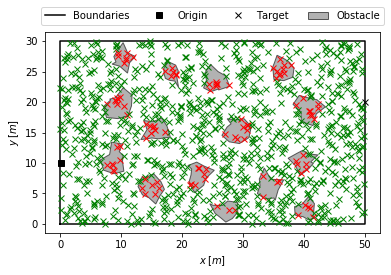

In [12]:
# plot the environment
fig, ax = mis.plot_traj()
# plot 1000 random points within boundaries
for _ in range(1000):
    x = np.random.uniform(*mis.xbound)
    y = np.random.uniform(*mis.ybound)
    # plot in green if point is safe, red otherwise
    if mis.safe([x,y]):
        ax.plot(x, y, 'gx')
    else:
        ax.plot(x, y, 'rx')
        
plt.show()

Now, let's take a look at the safety of position segments.

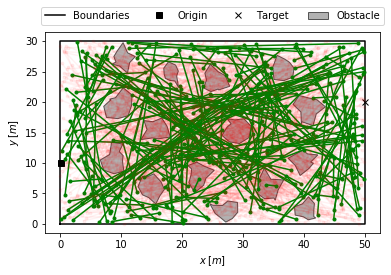

In [13]:
fig, ax = mis.plot_traj()
# plot 1000 random line segments within boundaries
for _ in range(1000):
    x = np.random.uniform(*mis.xbound, (2, 1))
    y = np.random.uniform(*mis.ybound, (2, 1))
    p = np.hstack((x, y))
    if mis.safe(p[0], p[1]):
        ax.plot(p[:,0], p[:,1], 'g.-')
    else:
        ax.plot(p[:,0], p[:,1], 'r.-', alpha=0.05)
plt.show()

Now, let's take a look at the `done` method, which tells us whether or not a position is approximately at the target. This method simply returns `True` or `False`. Just for fun let's visualise it, like we did with `safe`.

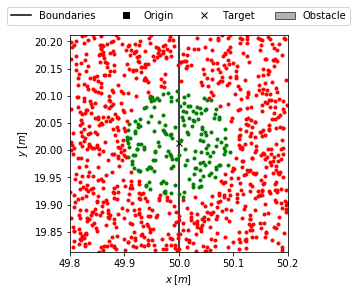

In [14]:
fig, ax = mis.plot_traj()
# area around target
lb = mis.target - 0.2
ub = mis.target + 0.2
# 1000 random points within boundaries
for _ in range(1000):
    
    # random position
    x = np.random.uniform(lb[0], ub[0])
    y = np.random.uniform(lb[1], ub[1])
    p = np.array([x, y])
    
    # distance to target
    d = np.linalg.norm(mis.target - p)
    
    if mis.done(p):
        ax.plot(x, y, 'g.')
    else:
        ax.plot(x, y, 'r.')
        pass
ax.set_xlim(lb[0], ub[0])
ax.set_ylim(lb[1], ub[1])
plt.show()

Now, let's take a look at the `step` method, which simulates the car's motion in time, given a steering angle control `u` between $[-\pi/2, \pi/2]$. 

This method accepts either a constant control `float` or a control function in the form `control_function(time, state)`.

In the simplest case, this method simulates the car's motion one step in time, where the time step-size is determine automatically, as shown below:

In [15]:
# random constant control
u = np.random.uniform(-0.3, 0.3)

# random control function
uf = lambda t, s: np.random.uniform(-0.3, 0.3)

# print original state and time
print(mis.state, mis.time)

# take on step in time with control function
state, control, time, safe, done = mis.step(uf)
print(state, control, time)
print(mis.state, mis.time)

[ 0.1    10.0254  0.    ] 0.0
[ 0.1704 10.0249 -0.0147] -0.22597207555805576 0.07042401979601698
[ 0.1    10.0254  0.    ] 0.0


Note that the current state and time remain unchanged; however, if you wanted to make the change permanent you can invoke the `inplace` option . Below, we take a permanent step in time then reset.

In [16]:
print(mis.state, mis.time)
mis.step(uf, inplace=True)
print(mis.state, mis.time)
mis.reset()
print(mis.state, mis.time)

[ 0.1    10.0254  0.    ] 0.0
[ 0.1001 10.0254  0.    ] 6.590776358127943e-05
[ 0.1    10.0254  0.    ] 0.0


Additionally, if you wish for the step to be recorded into the records, you may invoke the `record` option, as shown below.

In [17]:
print(mis.states, mis.controls, mis.times)
mis.step(uf, record=True)
print(mis.states, mis.controls, mis.times)
mis.reset()
print(mis.states, mis.controls, mis.times)

[[ 0.1    10.0254  0.    ]] [] [0.]
[[ 0.1    10.0254  0.    ]
 [ 0.1001 10.0254  0.    ]] [0.2855] [0.     0.0001]
[[ 0.1    10.0254  0.    ]] [] [0.]


Note above that `record` and `inplace` act independantly.

If you desire to simulate the car's motion for a specific duration, you can invoke the `Dt` option. Below, we simulate the car's motion for 1 second and 100 seconds.

In [18]:
states, controls, times, safe, done = mis.step(uf, Dt=1)
print(states, controls, times, safe, done)
states, controls, times, safe, done = mis.step(uf, Dt=100)
print(states, controls, times, safe, done)

[[ 0.1001 10.0254  0.    ]
 [ 0.1002 10.0254  0.    ]
 [ 0.1003 10.0254 -0.    ]
 ...
 [ 1.0929 10.0266  0.0012]
 [ 1.0994 10.0266 -0.0005]
 [ 1.1    10.0266 -0.0006]] [ 0.0949  0.0955 -0.221  ... -0.0226 -0.2646 -0.0663] [0.0001 0.0002 0.0003 ... 0.9929 0.9994 1.    ] True False
[[ 0.1065 10.0254 -0.0014]
 [ 0.1108 10.0254 -0.0008]
 [ 0.1151 10.0254 -0.    ]
 ...
 [ 6.5626 10.0197  0.0345]
 [ 6.6627 10.0224  0.0161]
 [ 6.7526 10.0239  0.0201]] [-0.231   0.1926  0.1618 ...  0.1603 -0.2157  0.0717] [0.0065 0.0108 0.0151 ... 6.4643 6.5643 6.6543] False False


We see above that the simulation of 1 second did indeed stop at 1 second. However, we see that the simulation of 100 seconds, stopped early. This is because `step` stops when either the motion was unsafe, due to an obstacle or boundaries, or it arrived at the `target`. In this case only `safe == False`, which means a collision occured, hence `times[-1] < 100`.

Lastly, incase you want more information, one may invoke the `verbose` option, in which simulation information is shown.

In [19]:
state, control, time, safe, done = mis.step(uf, verbose=True)

State: [ 0.1899 10.0259  0.0069]      Time: 0.090      Control: 0.077      Safe: True       Done: False     


Finally, we have `simulate`, which simulates a mission, given a sequences of `controls` and `times`, such that `len(controls) == len(times) - 1`,  where `controls[i]` is assumed to be constant between the times `times[i]` and `times[i+1]`. This method is used to validate the success of your sequences of controls and times, given the mission environment. Below we generate a seuquence of controls and times, then validate them.

In [20]:
mis.reset()
state, controls, times, safe, done = mis.step(uf, Dt=500, record=True)
print(len(mis.controls), len(mis.times))
res = mis.simulate(mis.controls, mis.times)
print(res)

299 300
0.12783416202625486


The `simulate` method returns the car's percent distance to the target. As we see above, we've made it about 13% of the way to the target.

We can now visualise the simulation, using the last two methods `plot_traj` and `plot_records`, now that the records have been populated.

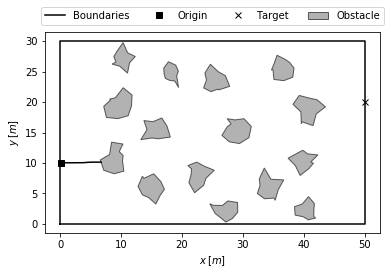

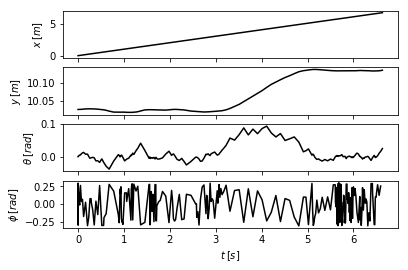

In [21]:
mis.plot_traj()
mis.plot_records()
plt.show()

And that's basically it; you've learnt all you need to know about the `mission` object to design your own planning method.

Now we'll just show a fun exmaple of things we can do below.

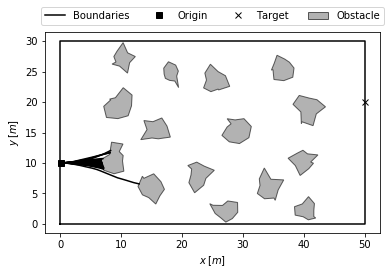

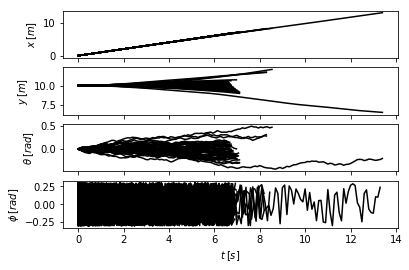

In [22]:
# reset mission
mis.reset()

# create environment plot
fig1, ax1 = mis.plot_traj()
fig2, ax2 = mis.plot_records()

# plot random trajectories
for _ in range(50):
    mis.step(uf, Dt=1000, record=True)
    mis.plot_traj(ax1)
    mis.plot_records(ax2)
    mis.reset()
    
plt.show()